# ecnunlp-tensorflow-tutorial

## Goal
  
 - Example: MNIST
 - DIY: Text Classification Task (about a week)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


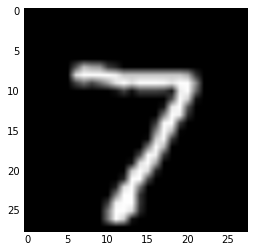

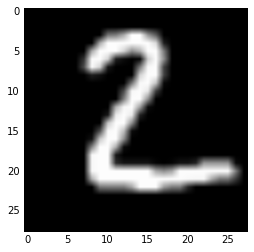

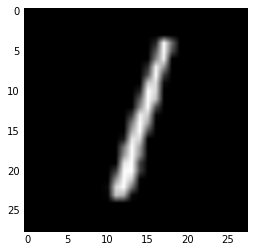

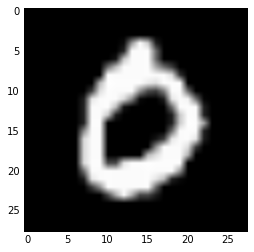

In [64]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

n_images = 4
# Get images from test set
test_images = mnist.test.images[:n_images]

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()


In [65]:
test_image = mnist.test.images[0]
test_label = mnist.test.labels[0]
print(len(test_image), len(test_label))
print(test_image, test_label)

784 10
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.     

## Framework
  - data
    - [784] -> [10]
  - algorithm [LR/SVM/etc]
    - train
    - predict
  - evaluation

In [ ]:
class Data(object):
    def __init__(self):
        pass

class Classifier(object):

    def __init__(self):
        pass

    def train_model(self):
        pass

    def test_model(self):
        pass

if __name__ == '__main__':

    data = Data()
    train_data = data.train_data
    dev_data = data.dev_data

    classifier = Classifier()
    classifier.train_model(train_data)

    predicts = classifier.test_model(dev_data)

    acc = evalution(gold_labels, predicts)

## Neural Networks

### take tensorflow as example

- Big Idea: express a numeric computation as a ``graph``
- Graph nodes are ``operations`` which have any number of inputs and outputs
- Graph edges are ``tensors`` which flow between nodes


In [66]:
import tensorflow as tf

a = tf.constant(3, name='a')

with tf.Session() as session:
    print(session.run(a))

3


In [67]:
a = tf.constant(3, name='a')
b = tf.constant(4, name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

7


In [68]:
W = tf.Variable(tf.random_uniform((784, 100), -1, 1))
b = tf.Variable(tf.zeros((100,)))

x = tf.placeholder(tf.float32, (100, 784))
h = tf.nn.relu(tf.matmul(x, W) + b)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
feed_dict = {
    x: np.random.random((100, 784))
}
sess.run([h], feed_dict)

[array([[ 17.69648933,   5.37214422,  14.72427082, ...,   6.12079239,
           3.00054884,  16.97977066],
        [ 21.63628387,   8.42848015,   4.14735031, ...,  12.08244514,
           0.        ,   8.22168255],
        [ 14.63829803,   0.        ,   6.60728884, ...,   7.81842613,
           7.42470694,  11.59100151],
        ..., 
        [ 18.77074432,   2.44019794,   8.40552711, ...,  10.52096844,
           2.3058033 ,  13.13805294],
        [ 22.45848846,   7.24740696,   9.28601933, ...,  12.66479492,
           0.        ,  10.74460602],
        [ 17.50292015,   0.88439751,  12.41012955, ...,   2.96692371,
           0.11943579,  14.43443871]], dtype=float32)]

In [ ]:
class Data(object):
    def __init__(self):
        pass
    
    def batch_iter(self):
        batch = None  
        yield batch

class Model(object):

    def __init__(self, params):
        # define the placeholder

        # define the variables

        # build the model graph
        # including: predict, loss, and train_op

    def train_model(sess, batch):
        feed_dict = {}
        to_return = {
            'train_op': self.train_op,
            'loss' : self. loss
        }
        return sess.run(to_return, feed_dict)
    
    def test_model(sess, batch):
        feed_dict = {}
        to_return = {
            'preds': self.pred
        }
        return sess.run(to_return, feed_dict)


if __name__ == '__main__':

    data = Data()
    train_data = data.train_data
    dev_data = data.dev_data

    model = Model()
    with tf.Session() as sess:
        for batch_data in train_data.batch_iter():
            results = model.train_model(sess, batch_data)
            loss = results['loss']
            
        preds = []
        for batch_data in test_data.batch_iter():
            results = model.test_model(sess, batch_data)
            preds.append(results['preds'])

        acc = evalution(gold_labels, predicts)

In [80]:
from tensorflow.examples.tutorials.mnist import input_data

# Parameters
learning_rate = 0.1
training_epochs = 25
batch_size = 100
display_step = 1


class Data(object):
    
    def __init__(self):
        mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
        
        self.mnist = mnist
        
    def batch_iter(self, batch_size):
        return  self.mnist.train.next_batch(batch_size)
    
    def test_data(self):
        x = self.mnist.test.images[:3000]
        y = self.mnist.test.labels[:3000]
        return x, y
    
    def __len__(self):
        return self.mnist.train.num_examples

    
        
class Model(object):
    
    def __init__(self):
        
        # tf Graph Input
        x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
        y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

        # Set model weights
        W1 = tf.Variable(tf.zeros([784, 100]), name='W1')
        b1 = tf.Variable(tf.zeros([100]), name='b1')

        h = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
        
        W2 = tf.Variable(tf.zeros([100, 10]), name='W2')
        b2 = tf.Variable(tf.zeros([10]), name='b2')
        
        # Construct model
        pred = tf.nn.softmax(tf.matmul(h, W2) + b2) # Softmax

        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
        # Gradient Descent
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
        
        self.x = x
        self.y = y
        self.pred = pred
        self.cost = cost
        self.optimizer = optimizer
        
    
    def train_model(self, sess, batch_xs, batch_ys):
        feed_dict = {
            self.x: batch_xs,
            self.y: batch_ys
        }
        to_return = {
            'train_op': self.optimizer,
            'loss': self.cost
        }
        return sess.run(to_return, feed_dict)

    def test_model(self, sess, batch_xs):
        feed_dict = {
            self.x: batch_xs
        }
        to_return = {
            'pred': self.pred
        }
        return sess.run(to_return, feed_dict)
        

    def eval_model(self, sess, batch_xs, batch_ys):
         # Test model
        correct_prediction = tf.equal(tf.argmax(self.pred, 1), tf.argmax(self.y, 1))
        # Calculate accuracy for 3000 examples
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        feed_dict = {
            self.x: batch_xs,
            self.y: batch_ys
        }
        to_return = {
            'acc': accuracy
        }
        return sess.run(to_return, feed_dict)
        
data = Data()
model = Model()

# Start training
with tf.Session() as sess:
    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    sess.run(init)
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(data) / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = data.batch_iter(batch_size)
            # Fit training using batch data
            results = model.train_model(sess, batch_xs, batch_ys)
            c = results['loss']
            
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            
    print("Optimization Finished!")

    test_xs, test_ys = data.test_data()
    acc = model.eval_model(sess, test_xs, test_ys)
    print("Accuracy:", acc)
        
        

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 2.305619851
Epoch: 0002 cost= 2.243195072
Epoch: 0003 cost= 1.985234603
Epoch: 0004 cost= 1.850272131
Epoch: 0005 cost= 1.770355481
Epoch: 0006 cost= 1.715193817
Epoch: 0007 cost= 1.677093841
Epoch: 0008 cost= 1.482496015
Epoch: 0009 cost= 1.273069976
Epoch: 0010 cost= 1.187112955
Epoch: 0011 cost= 1.129390796
Epoch: 0012 cost= 1.017283443
Epoch: 0013 cost= 0.841557549
Epoch: 0014 cost= 0.659562579
Epoch: 0015 cost= 0.568384733
Epoch: 0016 cost= 0.523427348
Epoch: 0017 cost= 0.492343840
Epoch: 0018 cost= 0.464889062
Epoch: 0019 cost= 0.441211719
Epoch: 0020 cost= 0.420836763
Epoch: 0021 cost= 0.402663770
Epoch: 0022 cost= 0.387067833
Epoch: 0023 cost= 0.373799574
Epoch: 0024 cost= 0.362819316
Epoch: 0025 cost= 0.353364752
Optimization Finished!
Accuracy: {'acc': 0.87466669}


### API 

Example: Conv
- [tensorflow website] https://www.tensorflow.org/versions/r1.2/api_docs/python/tf/nn/conv2d
- [search github/google] https://github.com/search?l=Python&p=2&q=CNN&type=Repositories&utf8=%E2%9C%93
- http://www.wildml.com/2015/12/implementing-a-cnn-for-text-classification-in-tensorflow/




In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
# Some BUGs 
# TODO: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/mnist/mnist_with_summaries.py



class Model(object):
    
    def __init__(self):
        
        # tf Graph Input
        x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
        y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

        
        
        # Create some wrappers for simplicity
        def conv2d(x, W, b, strides=1):
            # Conv2D wrapper, with bias and relu activation
            x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
            x = tf.nn.bias_add(x, b)
            return tf.nn.relu(x)


        def maxpool2d(x, k=2):
            # MaxPool2D wrapper
            return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

        # Store layers weight & bias
        weights = {
            # 5x5 conv, 1 input, 32 outputs
            'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
            # 5x5 conv, 32 inputs, 64 outputs
            'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
            # fully connected, 7*7*64 inputs, 1024 outputs
            'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
            # 1024 inputs, 10 outputs (class prediction)
            'out': tf.Variable(tf.random_normal([1024, 10]))
        }

        biases = {
            'bc1': tf.Variable(tf.random_normal([32])),
            'bc2': tf.Variable(tf.random_normal([64])),
            'bd1': tf.Variable(tf.random_normal([1024])),
            'out': tf.Variable(tf.random_normal([10]))
        }
        
        # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
        # Reshape to match picture format [Height x Width x Channel]
        # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
        # x: [batch, 784]
        # reshape_x: [batch, 28, 28, 1]
        reshape_x = tf.reshape(x, shape=[-1, 28, 28, 1])

        # Convolution Layer
        # conv1: [batch, 28, 28, 32]
        conv1 = conv2d(reshape_x, weights['wc1'], biases['bc1'])
        # Max Pooling (down-sampling)
        # conv1: [batch, 14, 14, 32]
        conv1 = maxpool2d(conv1, k=2)

        # Convolution Layer
        # conv1: [batch, 14, 14, 64]
        conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
        # Max Pooling (down-sampling)
        # conv2: [batch, 7, 7, 64]
        conv2 = maxpool2d(conv2, k=2)

        # Fully connected layer
        # Reshape conv2 output to fit fully connected layer input
        # fc1: [batch, 7*7*64]
        fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
        # fc1: [batch, 1024]
        fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
        fc1 = tf.nn.relu(fc1)
        
        # Apply Dropout
        # fc1: [batch, 1024]
        fc1 = tf.nn.dropout(fc1, dropout)

        # Output, class prediction
        # [batch, 10]
        out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
        
        # Construct model
        pred = tf.nn.softmax(out) # Softmax

        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
        # Gradient Descent
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
        
        self.x = x
        self.y = y
        self.pred = pred
        self.cost = cost
        self.optimizer = optimizer
        
    
   
        

## Text Classification Task
- https://github.com/FudanNLP/nlpcc2017_news_headline_categorization
- nlpcc data
  - precision: 
   ```
   cd /data/expr
   cp -r nlpcc/ YOUR_EXPR_PATH
  ```
- example

> finance&nbsp;&nbsp;&nbsp;&nbsp;建 行 按 揭 贷 余 额 超 3 万 亿 还 将 大 力 发 展<br>
society&nbsp;&nbsp;&nbsp;&nbsp;头 号 老 赖 欠 款 2 亿 拆 东 墙 补 西 墙 终 欠 下 2 亿 元<br>
entertainment&nbsp;&nbsp;&nbsp;&nbsp;对 卡 戴 珊 来 说 ， 每 一 次 换 装 都 是 一 次 宣 传<br>
entertainment&nbsp;&nbsp;&nbsp;&nbsp;陈 妍 希 陈 晓 7 月 大 婚 ， 你 看 好 他 俩 吗 ？<br>
car	变 道 和 转 弯 ， 没 让 直 行 车 辆 后 果 可 不 轻<br>
game&nbsp;&nbsp;&nbsp;&nbsp;打 辅 助 位 的 正 统 T D ！ 坦 克 世 界 斯 太 尔 W T 的 战 场 理 解<br>
tech&nbsp;&nbsp;&nbsp;&nbsp;大 数 据 人 才 炙 手 可 热 薪 酬 到 底 有 多 高 ？<br>
travel&nbsp;&nbsp;&nbsp;&nbsp;月 薪 3 0 0 0 元 的 常 州 人 ， 到 这 些 国 家 瞬 间 成 土 豪 ！<br>
history&nbsp;&nbsp;&nbsp;&nbsp;清 朝 灭 亡 时 只 有 2 2 行 省 ， 现 在 却 有 3 4 个 ， 那 些 省 份 是 新 出 的 ？<br>

```
.
|-- embed
├── char
│   ├── dev.txt
│   ├── id2tag.txt
│   ├── test.txt
│   ├── train.txt
│   └── vocab.txt
└── word
    ├── dev.txt
    ├── id2tag.txt
    ├── test.txt
    ├── train.txt
    ├── vocab.100k
    └── vocab.all
```


## Tips and Tricks

- load embeddings
- padding

- variable sharing
- mask
- dropout in train/test

- early stop
- visualize: tensorboard

### Dimensionality and Broadcasting

https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html

> When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when
   - they are equal, or
   - one of them is 1


In [ ]:
import tensorflow as tf

a = tf.constant(3, name='a')

with tf.Session() as session:
    print(session.run(a))

In [ ]:
a = tf.constant(3, name='a')
b = tf.constant(4, name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

In [69]:
a = tf.constant([1, 2, 3], name='a')
b = tf.constant([4, 5, 6], name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[5 7 9]


In [70]:
a = tf.constant([1, 2, 3], name='a')
b = tf.constant(4, name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[5 6 7]


In [71]:
a = tf.constant([[1, 2, 3], [4, 5, 6]], name='a')
b = tf.constant([[1, 2, 3], [4, 5, 6]], name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[[ 2  4  6]
 [ 8 10 12]]


In [72]:
a = tf.constant([[1, 2, 3], [4, 5, 6]], name='a')
b = tf.constant(100, name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[[101 102 103]
 [104 105 106]]


In [74]:
a = tf.constant([[1, 2, 3], [4, 5, 6]], name='a')
b = tf.constant([100, 101], name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

ValueError: Dimensions must be equal, but are 3 and 2 for 'add_38' (op: 'Add') with input shapes: [2,3], [2].

In [73]:
a = tf.constant([[1, 2, 3], [4, 5, 6]], name='a')
b = tf.constant([[100], [101]], name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[[101 102 103]
 [105 106 107]]


In [ ]:
# Conv-Maxpool
# api: https://www.tensorflow.org/versions/r1.2/api_docs/python/tf/nn/conv2d
# blog: http://www.wildml.com/2015/12/implementing-a-cnn-for-text-classification-in-tensorflow/
# tensorflow-example: https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/convolutional_network.ipynb
pooled_outputs = []
for i, filter_size in enumerate(filter_sizes):
    with tf.name_scope("conv-maxpool-%s" % filter_size):
        # Convolution Layer
        filter_shape = [filter_size, embedding_size, 1, num_filters]
        W = tf.Variable(tf.truncated_normal(filter_shape, stddev=0.1), name="W")
        b = tf.Variable(tf.constant(0.1, shape=[num_filters]), name="b")
        conv = tf.nn.conv2d(
            self.embedded_chars_expanded,
            W,
            strides=[1, 1, 1, 1],
            padding="VALID",
            name="conv")
        # Apply nonlinearity
        h = tf.nn.relu(tf.nn.bias_add(conv, b), name="relu")
        # Max-pooling over the outputs
        pooled = tf.nn.max_pool(
            h,
            ksize=[1, sequence_length - filter_size + 1, 1, 1],
            strides=[1, 1, 1, 1],
            padding='VALID',
            name="pool")
        pooled_outputs.append(pooled)
 
# Combine all the pooled features
num_filters_total = num_filters * len(filter_sizes)
self.h_pool = tf.concat(3, pooled_outputs)
self.h_pool_flat = tf.reshape(self.h_pool, [-1, num_filters_total])